In [2]:
'''
빵형의 개발도상국
https://youtu.be/T0DO1C8uYP8

roboflow
Mask Wearing Dataset
https://public.roboflow.com/object-detection/mask-wearing



***label폴더의 txt파일 값에 대한 정보***

000_1ov3n5_0_jpeg.rf.edad89426b118f4c76ba4ae3790b3f31.txt

<class, x value, y value, width, height>
0 0.4669354838709677 0.23925501432664756 0.18225806451612903 0.3123209169054441

모든 값이 픽셀 value기준이 아니라 소숫점으로 나와있다. (조금 특이, gwd에는 1024를 나눠주는데 1024를 곱해줘야 pixel value가 될듯)

'''

'\n빵형의 개발도상국\nhttps://youtu.be/T0DO1C8uYP8\n\nroboflow\nMask Wearing Dataset\nhttps://public.roboflow.com/object-detection/mask-wearing\n\n\n\n***label폴더의 txt파일 값에 대한 정보***\n\n000_1ov3n5_0_jpeg.rf.edad89426b118f4c76ba4ae3790b3f31.txt\n\n<class, x value, y value, width, height>\n0 0.4669354838709677 0.23925501432664756 0.18225806451612903 0.3123209169054441\n\n모든 값이 픽셀 value기준이 아니라 소숫점으로 나와있다. (조금 특이, gwd에는 1024를 나눠주는데 1024를 곱해줘야 pixel value가 될듯)\n\n'

In [3]:
# %cd /content     -> content 폴더로 이동

In [4]:
!git clone https://github.com/ultralytics/yolov5.git

'yolov5'에 복제합니다...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 3520 (delta 14), reused 15 (delta 6), pack-reused 3489
오브젝트를 받는 중: 100% (3520/3520), 6.82 MiB | 4.61 MiB/s, 완료.
델타를 알아내는 중: 100% (2349/2349), 완료.


In [34]:
# # yolov5 디렉토리로 이동 후 yolov5를 위한 패키지 설치하기 (코랩과 주소치는 법이 다름 / -> ./)
# %cd ./yolov5/
# !pip install -r requirements.txt

In [18]:
%cat ../data/data.yaml

# nc = 0 마스크를 씀, nc =1 마스크를 안씀
# %pwd -> 현재 디렉토리 위치

train: ../train/images
val: ../valid/images

nc: 2
names: ['mask', 'no-mask']

In [19]:
'''
mask data는 train과 valid가 잘 나누어져 있지만 튜토리얼의 피스톨 데이터는 나눠져 있지 않으므로 나누는 코드를 짜보자.
data.yaml에 저장된 train/val경로도 학습 경로에 맞게 재지정할 필요가 있어보인다.

# 디렉토리를 루트 디렉토리로 바꿈
%cd /
from glob import glob

img_list = glob('/content/dataset/export/images/*.jpg')

print(len(img_list))     #결과값 2971. 2971개의 이미지가 있다.


# 데이터를 학습데이터와 검증데이터로 나눔
from sklearn.model_selection import train_test_split
train_img_list, val_img_list = train_test_split(img_list, test_size=0.2, random_state=2000)

print(len(train_img_list), len(val_img_list))     #결과값 2376, 595개의 이미지가 있다.


# 학습 이미지 경로와 검증 이미지 경로를 txt파일로 저장
with open('/content/dataset/train.txt', 'w') as f:
    f.write('\n'.join(train_img_list) + '\n')
    
with open('/content/dataset/val.txt', 'w') as f:
    f.write('\n'.join(val_img_list) + '\n')


# 기존에 data.yaml에 저장되어 있던 데이터 경로 수정
import yaml

with open('/content/dataset/data.yaml', 'r') as f:
    data = yaml.load(f)
    
print(data)

data['train'] = '/content/dataset/train.txt'
data['val'] = '/content/dataset/val.txt'

# yaml.dump는 파일을 저장할때 사용
with open('/content/dataset/data.yaml', 'w') as f:
    yaml.dump(data, f)
    
print(data)

'''

"\nmask data는 train과 valid가 잘 나누어져 있지만 튜토리얼의 피스톨 데이터는 나눠져 있지 않으므로 나누는 코드를 짜보자.\ndata.yaml에 저장된 train/val경로도 학습 경로에 맞게 재지정할 필요가 있어보인다.\n\n# 디렉토리를 루트 디렉토리로 바꿈\n%cd /\nfrom glob import glob\n\nimg_list = glob('/content/dataset/export/images/*.jpg')\n\nprint(len(img_list))     #결과값 2971. 2971개의 이미지가 있다.\n\n\n# 데이터를 학습데이터와 검증데이터로 나눔\nfrom sklearn.model_selection import train_test_split\ntrain_img_list, val_img_list = train_test_split(img_list, test_size=0.2, random_state=2000)\n\nprint(len(train_img_list), len(val_img_list))     #결과값 2376, 595개의 이미지가 있다.\n\n\n# 학습 이미지 경로와 검증 이미지 경로를 txt파일로 저장\nwith open('/content/dataset/train.txt', 'w') as f:\n    f.write('\n'.join(train_img_list) + '\n')\n    \nwith open('/content/dataset/val.txt', 'w') as f:\n    f.write('\n'.join(val_img_list) + '\n')\n\n\n# 기존에 data.yaml에 저장되어 있던 데이터 경로 수정\nimport yaml\n\nwith open('/content/dataset/data.yaml', 'r') as f:\n    data = yaml.load(f)\n    \nprint(data)\n\ndata['train'] = '/content/dataset/train.txt'\n"

In [22]:
%pwd

'/home/kerrykim/jupyter_notebook/9. yolo_tutorial/yolov5'

In [26]:
import yaml

with open('../data/data.yaml', 'r') as f:
    data = yaml.load(f)
    
print(data)

data['train'] = '../data/train/images/'
data['val'] = '../data/valid/images/'

# yaml.dump는 파일을 저장할때 사용
with open('../data/data.yaml', 'w') as f:
    yaml.dump(data, f)
    
print(data)

{'names': ['mask', 'no-mask'], 'nc': 2, 'train': '../data/train.txt', 'val': '../data/val.txt'}
{'names': ['mask', 'no-mask'], 'nc': 2, 'train': '../data/train/images/', 'val': '../data/valid/images/'}


/home/kerrykim/anaconda3/envs/cuda_python_3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  after removing the cwd from sys.path.


In [36]:
# Yolov5 repository -> Tutorials, Train Custom Data -> 5. Train 에서 어떻게 코드를 입력하는지 나옴
# cfg는 모델 구조를 나타내며 yolov5>models>에 있는 yolov5L~x.yaml 4개 모델 크기 파일들을 말한다. 그중 모델 크기에 맞는 하나를 선택한다.
# pre-trained weight를 사용하려면 --weight yolo5s.pt 를 쓰면 학습된 가중치를 다운받아 사용할 수 있다.

!python train.py --img 416 --batch 4 --epochs 100 --data ../data/data.yaml --cfg ./models/yolov5s.yaml --weights yolov5x.pt --name mask_check_model

Using torch 1.7.1 CUDA:0 (GeForce RTX 2070 SUPER, 7974.3125MB)

Namespace(adam=False, batch_size=4, bucket='', cache_images=False, cfg='./models/yolov5s.yaml', data='../data/data.yaml', device='', epochs=100, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[416, 416], local_rank=-1, log_artifacts=False, log_imgs=16, multi_scale=False, name='mask_check_model', noautoanchor=False, nosave=False, notest=False, project='runs/train', rect=False, resume=False, save_dir='runs/train/mask_check_model7', single_cls=False, sync_bn=False, total_batch_size=4, weights='yolov5x.pt', workers=8, world_size=1)
Start Tensorboard with "tensorboard --logdir runs/train", view at http://localhost:6006/
2020-12-25 22:52:09.903000: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2020-12-25 22:52:09.90302


     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
      9/99    0.482G   0.09951    0.2013   0.02333    0.3241        14       416
               Class      Images     Targets           P           R      mAP@.5
                 all          29         162    0.000546        0.05     0.00132    0.000176

     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
     10/99    0.482G   0.09805     0.208   0.02231    0.3283        13       416
               Class      Images     Targets           P           R      mAP@.5
                 all          29         162    0.000632      0.0535    0.000219    4.05e-05

     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
     11/99    0.482G    0.0964    0.1746    0.0223    0.2933         6       416
               Class      Images     Targets           P           R      mAP@.5
                 all          29         162    0.000343     0.00352    0.000267  

     33/99    0.482G    0.0877    0.1703   0.01589    0.2739        25       416
               Class      Images     Targets           P           R      mAP@.5
                 all          29         162      0.0218       0.197      0.0283     0.00657

     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
     34/99    0.482G    0.0913    0.1583   0.01656    0.2662         4       416
               Class      Images     Targets           P           R      mAP@.5
                 all          29         162      0.0555        0.12      0.0418       0.011

     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
     35/99    0.482G   0.09077     0.164   0.01907    0.2739        10       416
               Class      Images     Targets           P           R      mAP@.5
                 all          29         162      0.0181       0.331      0.0544      0.0125

     Epoch   gpu_mem       box       obj       cls     total   targets

               Class      Images     Targets           P           R      mAP@.5
                 all          29         162      0.0435       0.324       0.155      0.0509

     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
     58/99    0.482G   0.06878    0.1606   0.01346    0.2428         4       416
               Class      Images     Targets           P           R      mAP@.5
                 all          29         162      0.0339       0.405       0.179      0.0583

     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
     59/99    0.482G   0.06888    0.1555   0.01548    0.2398         9       416
               Class      Images     Targets           P           R      mAP@.5
                 all          29         162      0.0797        0.38       0.272      0.0945

     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
     60/99    0.482G   0.06638    0.1743   0.01757    0.2582        11


     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
     82/99    0.482G   0.05899    0.1451   0.01638    0.2205         9       416
               Class      Images     Targets           P           R      mAP@.5
                 all          29         162       0.116       0.423       0.337       0.133

     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
     83/99    0.482G   0.06199    0.1594   0.01524    0.2366         2       416
               Class      Images     Targets           P           R      mAP@.5
                 all          29         162       0.156       0.455       0.367       0.148

     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
     84/99    0.482G   0.05998    0.1415   0.01347    0.2149         7       416
               Class      Images     Targets           P           R      mAP@.5
                 all          29         162       0.106       0.384       0.302  

In [ ]:
'''
진행중 화면에는 Class Iamges Targets P R MAP가 있는데 이것은 validation에 대한 정보이다. (즉 검증 데이터가 29개)

학습결과는 yolov5>runs>train>mask_check_model1, 2, 3, 4, 5 ... 식으로 저장된다.

가중치는 yolov5>runs>train>mask_check_model>weight에 best.pt, last.pt 파이토치 모델로 저장된다.

test_batch0_gt.jpg   검증데이터의 라벨을 표현한 사진 (내 모델은 gt가 아니라 labels로 표현됨)
test_batch0_pred.jpg 모델이 예측한 검증데이터의 라벨링 사진

학습결과가 성능이 좋진 못하다.
'''

In [33]:
# # 텐서보드에 띄워보기
# %load_ext tensorboard
# %tensorboard --logdir ./runs/

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', exist_ok=False, img_size=416, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='../data/test/images/w1240-p16x9-fa978043deff83fed485af12d16e39c61398fc30_jpg.rf.e68ac161036e4bffd3538903b28c721e.jpg', update=False, view_img=False, weights=['./runs/train/mask_check_model7/weights/best.pt'])
Using torch 1.7.1 CUDA:0 (GeForce RTX 2070 SUPER, 7974.3125MB)

Fusing layers... 
Model Summary: 232 layers, 7249215 parameters, 0 gradients, 16.8 GFLOPS
image 1/1 /home/kerrykim/jupyter_notebook/9. yolo_tutorial/data/test/images/w1240-p16x9-fa978043deff83fed485af12d16e39c61398fc30_jpg.rf.e68ac161036e4bffd3538903b28c721e.jpg: 256x416 1 masks, Done. (0.009s)
Results saved to runs/detect/exp3
Done. (0.034s)


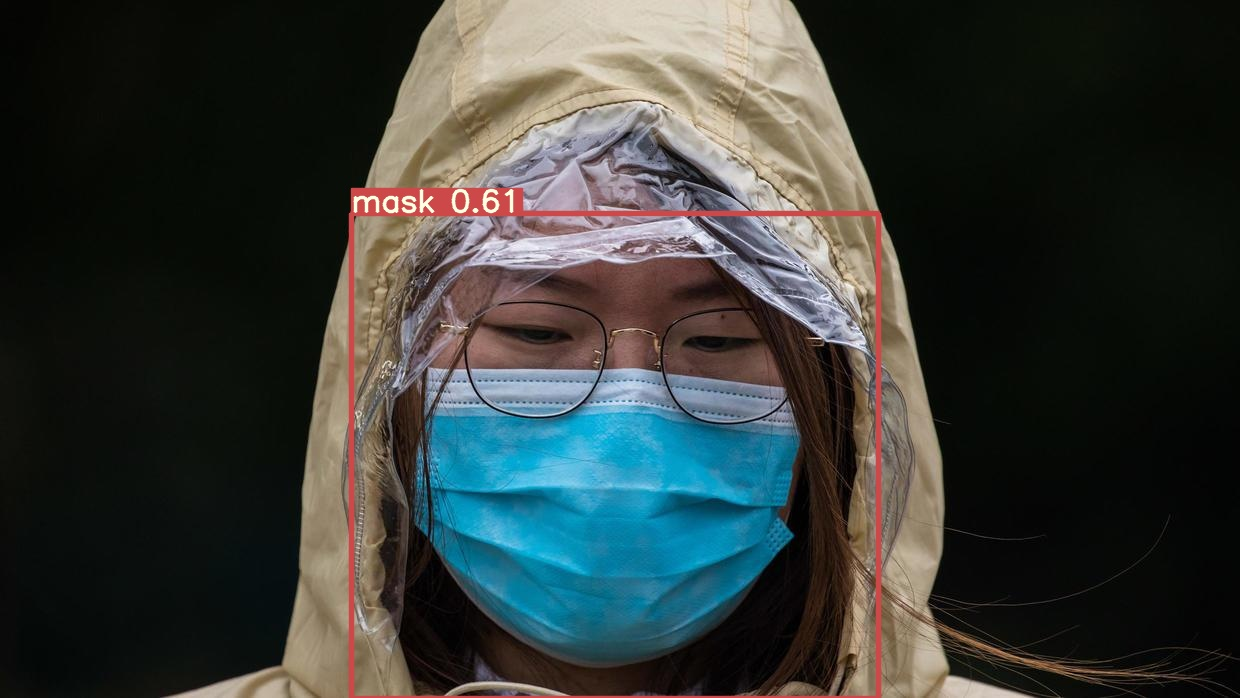

In [39]:
# 데이터 테스트 해보기
# --conf는 신뢰도로 클래스가 원핫 인코딩되기전의 확률값이 얼마 이상이면 보여줄수 있도록 설정하는 듯함
from glob import glob

from IPython.display import Image
import os

test_img_list = glob('../data/test/images/*.jpg')

test_img = test_img_list[1]


!python detect.py --weights ./runs/train/mask_check_model7/weights/best.pt --img 416 --conf 0.5 --source "{test_img}"
#위 구문을 치면 inference 폴더에 결과사진이 저장된다.

#영상과는 달리 폴더이름이 매번 exp#으로 늘어난다.
Image(os.path.join('./runs/detect/exp3', os.path.basename(test_img)))

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', exist_ok=False, img_size=416, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='../data/test/images/0_Concern-In-China-As-Mystery-Virus-Spreads_jpg.rf.5633f5fe7a9b926101b7fc16615dfb6a.jpg', update=False, view_img=False, weights=['./runs/train/mask_check_model7/weights/best.pt'])
Using torch 1.7.1 CUDA:0 (GeForce RTX 2070 SUPER, 7974.3125MB)

Fusing layers... 
Model Summary: 232 layers, 7249215 parameters, 0 gradients, 16.8 GFLOPS
image 1/1 /home/kerrykim/jupyter_notebook/9. yolo_tutorial/data/test/images/0_Concern-In-China-As-Mystery-Virus-Spreads_jpg.rf.5633f5fe7a9b926101b7fc16615dfb6a.jpg: 224x416 2 masks, Done. (0.007s)
Results saved to runs/detect/exp4
Done. (0.029s)


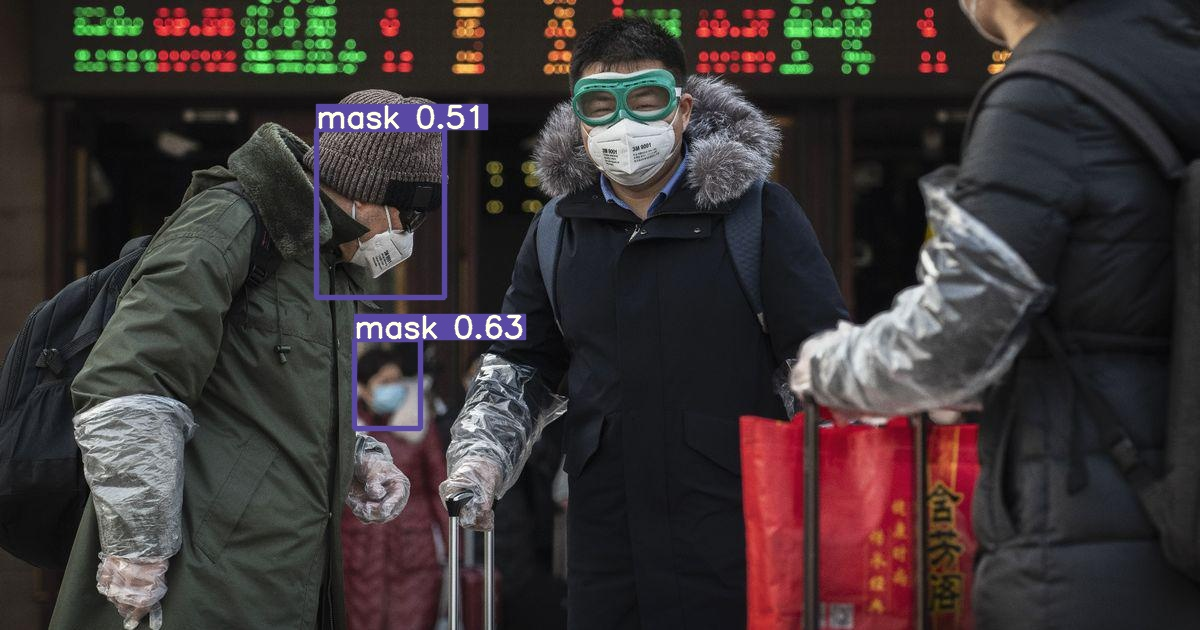

In [40]:
test_img = test_img_list[10]


!python detect.py --weights ./runs/train/mask_check_model7/weights/best.pt --img 416 --conf 0.5 --source "{test_img}"
#위 구문을 치면 inference 폴더에 결과사진이 저장된다.

#영상과는 달리 폴더이름이 매번 exp#으로 늘어난다.
Image(os.path.join('./runs/detect/exp4', os.path.basename(test_img)))

In [ ]:
# detect.py --source ./white_pistol.mp4 처럼 동영상 파일을 넣어도 학습이 잘된다. 그리고 추론폴더에 저장됨